# Importing Libraries

In [41]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

# Reading Data

In [42]:
tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2018-01-01')
# df.head()

In [43]:
# df.tail()

In [44]:
df = df['Close'].values
df = df.reshape(-1, 1)

In [45]:
df.shape

(1409, 1)

# Train Test Split

In [46]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [47]:
# df[:int(df.shape[0]*0.8)].shape

In [48]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [49]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [50]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [51]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# With the results of hyperparameter tuning (Run 2)

In [52]:
model = Sequential()
model.add(LSTM(units=300, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.3))
model.add(LSTM(units=500,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=450,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=300))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [53]:
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [54]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

In [55]:
model.fit(x_train, y_train, epochs=100, batch_size=32)
model.save(tk+'_stock_prediction.h5')

Epoch 1/100
34/34 [==============================] - 98s 3s/step - loss: 0.1239
Epoch 2/100
34/34 [==============================] - 101s 3s/step - loss: 0.0031
Epoch 3/100
34/34 [==============================] - 93s 3s/step - loss: 0.0022
Epoch 4/100
34/34 [==============================] - 100s 3s/step - loss: 0.0022
Epoch 5/100
34/34 [==============================] - 96s 3s/step - loss: 0.0020
Epoch 6/100
34/34 [==============================] - 94s 3s/step - loss: 0.0020
Epoch 7/100
34/34 [==============================] - 93s 3s/step - loss: 0.0020
Epoch 8/100
34/34 [==============================] - 110s 3s/step - loss: 0.0021
Epoch 9/100
34/34 [==============================] - 106s 3s/step - loss: 0.0023
Epoch 10/100
34/34 [==============================] - 103s 3s/step - loss: 0.0018
Epoch 11/100
34/34 [==============================] - 94s 3s/step - loss: 0.0018
Epoch 12/100
34/34 [==============================] - 93s 3s/step - loss: 0.0020
Epoch 13/100
34/34 [============

C:\Users\Shemeen62\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [56]:
model = load_model(tk+'_stock_prediction.h5')

8/8 [==============================] - 6s 609ms/step


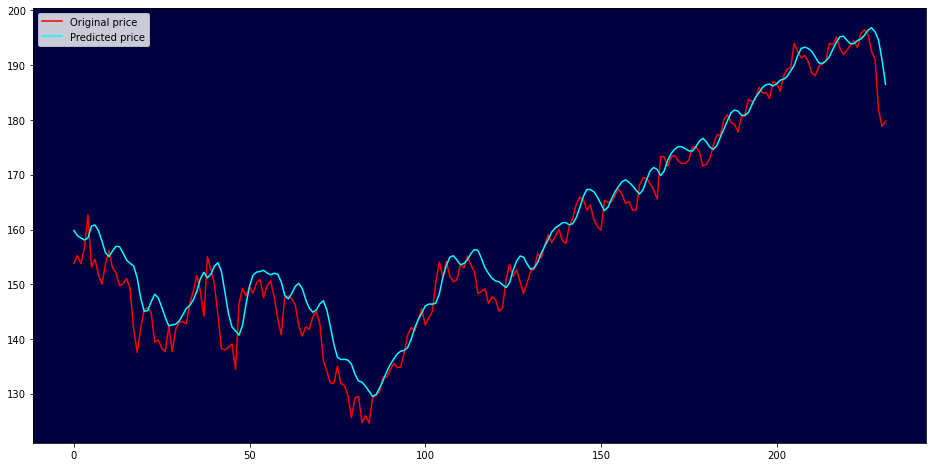

In [57]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Calculate mean squared error (MSE) and mean absolute error (MAE)
mse = mean_squared_error(y_test_scaled, predictions)
mae = mean_absolute_error(y_test_scaled, predictions)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 18.609568248678016
Mean Absolute Error (MAE): 3.2023200988769513


# Different Hyperparameter optimization methods

# Loop model

In [24]:
# !pip install keras --upgrade

In [66]:
import numpy as np
import pandas as pd
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit

In [19]:
tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2018-01-01')

df = df['Close'].values
df = df.reshape(-1, 1)

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x, y

x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Set the hyperparameters to tune and their possible values
lstm_units_values = [50, 100, 150]
dense_units_values = [1, 50, 100]
dropout_rate_values = [0.2, 0.3, 0.4]
epochs_values = [50, 100, 150]

best_mse = float('inf')
best_lstm_units = None
best_dense_units = None
best_dropout_rate = None
best_epochs = None

# Perform hyperparameter tuning with nested loops
for lstm_units in lstm_units_values:
    for dense_units in dense_units_values:
        for dropout_rate in dropout_rate_values:
            for epochs in epochs_values:
                model = Sequential()
                model.add(LSTM(units=lstm_units, return_sequences=True, input_shape=(x_train.shape[1], 1)))
                model.add(Dropout(dropout_rate))
                model.add(LSTM(units=lstm_units, return_sequences=True))
                model.add(Dropout(dropout_rate))
                model.add(LSTM(units=lstm_units))
                model.add(Dropout(dropout_rate))
                model.add(Dense(units=dense_units))
                model.compile(loss='mean_squared_error', optimizer='adam')

                model.fit(x_train, y_train, epochs=epochs, batch_size=32, verbose=0)
                predictions = model.predict(x_test)
                predictions = scaler.inverse_transform(predictions)
                mse = np.mean((y_test - predictions)**2)

                if mse < best_mse:
                    best_mse = mse
                    best_lstm_units = lstm_units
                    best_dense_units = dense_units
                    best_dropout_rate = dropout_rate
                    best_epochs = epochs

print("Best LSTM units:", best_lstm_units)
print("Best Dense units:", best_dense_units)
print("Best Dropout rate:", best_dropout_rate)
print("Best Epochs:", best_epochs)

# Train the LSTM model with the best hyperparameters
best_model = Sequential()
best_model.add(LSTM(units=best_lstm_units, return_sequences=True, input_shape=(x_train.shape[1], 1)))
best_model.add(Dropout(best_dropout_rate))
best_model.add(LSTM(units=best_lstm_units, return_sequences=True))
best_model.add(Dropout(best_dropout_rate))
best_model.add(LSTM(units=best_lstm_units))
best_model.add(Dropout(best_dropout_rate))
best_model.add(Dense(units=best_dense_units))
best_model.compile(loss='mean_squared_error', optimizer='adam')

best_model.fit(x_train, y_train, epochs=best_epochs, batch_size=32, verbose=1)

# Save the best model
best_model.save(tk+'_stock_prediction.h5')

# Load the best model for predictions
model = load_model(tk+'_stock_prediction.h5')

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Reshape y_test to match the shape of predictions
y_test_reshaped = y_test.reshape(-1, 1)
y_test_scaled = scaler.inverse_transform(y_test_reshaped)

# Calculate MSE for each sample
mse_per_sample = np.mean((y_test_scaled - predictions)**2, axis=1)

# Calculate the overall mean MSE
mean_mse = np.mean(mse_per_sample)

print("Mean MSE:", mean_mse)

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions[:, -1], color='cyan', label='Predicted price')  # Take the last column of predictions
plt.legend()
plt.show()


# Bayesian Model

In [20]:
# !pip install tensorflow
# !pip install numpy --upgrade
# !pip install numpy==1.19.5

In [14]:
# !pip install scikit-optimize
import numpy as np
import pandas as pd
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import TimeSeriesSplit
from skopt import BayesSearchCV

In [40]:
tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2018-01-01')

df = df['Close'].values
df = df.reshape(-1, 1)

dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x, y

x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Define a custom estimator class for your LSTM model
class LSTMRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, lstm_units=50, dense_units=1, dropout_rate=0.2):
        self.lstm_units = lstm_units
        self.dense_units = dense_units
        self.dropout_rate = dropout_rate

    def create_lstm_model(self):
        model = Sequential()
        model.add(LSTM(units=self.lstm_units, return_sequences=True, input_shape=(x_train.shape[1], 1)))
        model.add(Dropout(self.dropout_rate))
        model.add(LSTM(units=self.lstm_units, return_sequences=True))
        model.add(Dropout(self.dropout_rate))
        model.add(LSTM(units=self.lstm_units))
        model.add(Dropout(self.dropout_rate))
        model.add(Dense(units=self.dense_units))
        model.compile(loss='mean_squared_error', optimizer='adam')
        return model

    def fit(self, X, y):
        self.model = self.create_lstm_model()
        x_train = X.reshape(X.shape[0], X.shape[1], 1)
        self.model.fit(x_train, y, epochs=100, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        x_test = X.reshape(X.shape[0], X.shape[1], 1)
        return self.model.predict(x_test)

# Set up the Bayesian optimization tuner with the custom LSTMRegressor
regressor = LSTMRegressor()

# Define the hyperparameter search space
search_space = {
    'lstm_units': (50, 150),
    'dense_units': (1, 100),
    'dropout_rate': (0.2, 0.4),
    'epochs': (50, 150)
}

bayes_cv_tuner = BayesSearchCV(
    regressor,
    search_space,
    n_iter=50,
    cv=TimeSeriesSplit(n_splits=5),
    n_jobs=-1,
    random_state=42
)

# Fit the Bayesian optimization tuner to find the best hyperparameters
result = bayes_cv_tuner.fit(x_train, y_train)

# Get the best hyperparameters
best_params = result.best_params_
best_lstm_units = best_params['lstm_units']
best_dense_units = best_params['dense_units']
best_dropout_rate = best_params['dropout_rate']
best_epochs = best_params['epochs']

print("Best LSTM units:", best_lstm_units)
print("Best Dense units:", best_dense_units)
print("Best Dropout rate:", best_dropout_rate)
print("Best Epochs:", best_epochs)

# Train the LSTM model with the best hyperparameters
best_model = create_lstm_model(best_lstm_units, best_dense_units, best_dropout_rate, best_epochs)

# Save the best model
best_model.save(tk+'_stock_prediction.h5')

# Load the best model for predictions
model = load_model(tk+'_stock_prediction.h5')

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()
plt.show()

# Gradient-Based Optimization

# To find the LSTM units and dropout combination

In [3]:
# !pip install keras-tuner

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras_tuner.tuners import RandomSearch

tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2013-01-01')

df = df['Close'].values
df = df.reshape(-1, 1)


dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)


def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y


x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


# Define the model-building function for the Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_1', min_value=100, max_value=500, step=50),
                   return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))
    
    model.add(LSTM(units=hp.Int('units_2', min_value=100, max_value=500, step=50),
                   return_sequences=True))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))
    
    model.add(LSTM(units=hp.Int('units_3', min_value=100, max_value=500, step=50),
                   return_sequences=True))
    model.add(Dropout(hp.Float('dropout_3', min_value=0.2, max_value=0.5, step=0.1)))
    
    model.add(LSTM(units=hp.Int('units_4', min_value=100, max_value=500, step=50)))
    model.add(Dropout(hp.Float('dropout_4', min_value=0.2, max_value=0.5, step=0.1)))
    
    model.add(Dense(units=1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Initialize the tuner and perform hyperparameter tuning
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Number of combinations to try
    executions_per_trial=1,  # Number of epochs per trial
    directory='tuner_logs',  # Directory to store logs
    project_name='stock_prediction'  # Project name
)

tuner.search(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

# Get the best hyperparameters and build the final model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
final_model = tuner.hypermodel.build(best_hps)
final_model.fit(x_train, y_train, epochs=100, batch_size=32)

# Save the final model
final_model.save(tk+'_stock_prediction_final.h5')

Trial 10 Complete [01h 58m 08s]
val_loss: 0.002005552174523473

Best val_loss So Far: 0.0015832447679713368
Total elapsed time: 13h 07m 01s
INFO:tensorflow:Oracle triggered exit
Epoch 1/100
66/66 [==============================] - 134s 2s/step - loss: 0.0553
Epoch 2/100
66/66 [==============================] - 127s 2s/step - loss: 0.0016
Epoch 3/100
66/66 [==============================] - 127s 2s/step - loss: 0.0014
Epoch 4/100
66/66 [==============================] - 126s 2s/step - loss: 0.0012
Epoch 5/100
66/66 [==============================] - 126s 2s/step - loss: 0.0012
Epoch 6/100
66/66 [==============================] - 128s 2s/step - loss: 0.0013
Epoch 7/100
66/66 [==============================] - 126s 2s/step - loss: 0.0012
Epoch 8/100
66/66 [==============================] - 126s 2s/step - loss: 8.8896e-04
Epoch 9/100
66/66 [==============================] - 126s 2s/step - loss: 9.1414e-04
Epoch 10/100
66/66 [==============================] - 126s 2s/step - loss: 0.0017
Epo

C:\Users\Shemeen62\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [4]:
tk = 'AAPL'
model = load_model(tk+'_stock_prediction_final.h5')

16/16 [==============================] - 12s 628ms/step


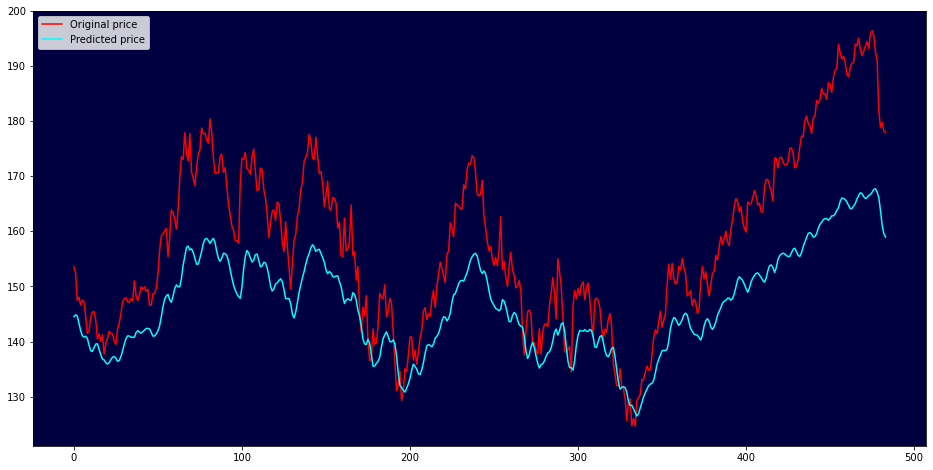

In [5]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

# For epochs and batch size (Early stopping with 100 Epochs)

INFO:tensorflow:Oracle triggered exit
Epoch 1/100
66/66 [==============================] - 189s 3s/step - loss: 4.2986e-04 - val_loss: 9.0594e-04
Epoch 2/100
66/66 [==============================] - 191s 3s/step - loss: 5.1931e-04 - val_loss: 0.0040
Epoch 3/100
66/66 [==============================] - 216s 3s/step - loss: 4.2533e-04 - val_loss: 0.0013
Epoch 4/100
66/66 [==============================] - 288s 4s/step - loss: 4.3747e-04 - val_loss: 9.0027e-04
Epoch 5/100
66/66 [==============================] - 233s 4s/step - loss: 4.6628e-04 - val_loss: 0.0012
Epoch 6/100
66/66 [==============================] - 201s 3s/step - loss: 4.5309e-04 - val_loss: 0.0010
Epoch 7/100
66/66 [==============================] - 209s 3s/step - loss: 4.4032e-04 - val_loss: 0.0010
Epoch 8/100
66/66 [==============================] - 202s 3s/step - loss: 4.7245e-04 - val_loss: 9.0381e-04
Epoch 9/100
66/66 [==============================] - 191s 3s/step - loss: 3.8455e-04 - val_loss: 8.7079e-04
Epoch 10/1

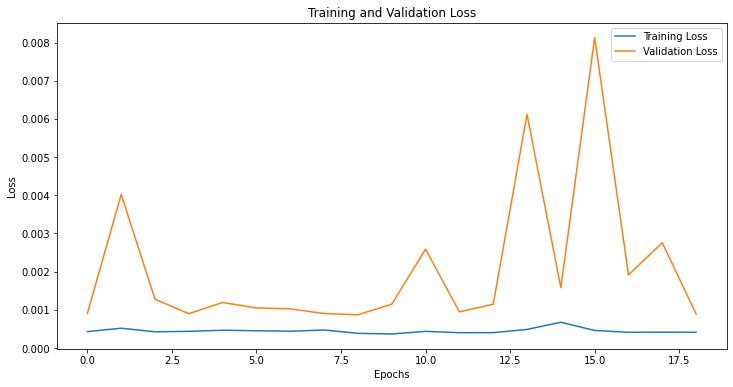

In [59]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras_tuner.tuners import RandomSearch
from keras.callbacks import EarlyStopping

tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2013-01-01')

df = df['Close'].values
df = df.reshape(-1, 1)


dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)


def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y


x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Search for the best hyperparameters
tuner.search(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

# Get the best hyperparameters for LSTM units and dropout rates
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Define the model-building function for the Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=300,
                   return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.3))
    
    model.add(LSTM(units=500,
                   return_sequences=True))
    model.add(Dropout(0.3))
    
    model.add(LSTM(units=450,
                   return_sequences=True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(units=300))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Model training
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])


# Plot the training loss and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# For epochs and batch size (Early stopping with 150 Epochs)

INFO:tensorflow:Oracle triggered exit
Epoch 1/150
66/66 [==============================] - 185s 3s/step - loss: 4.9214e-04 - val_loss: 0.0048
Epoch 2/150
66/66 [==============================] - 1322s 20s/step - loss: 5.4906e-04 - val_loss: 0.0366
Epoch 3/150
66/66 [==============================] - 1626s 25s/step - loss: 4.3218e-04 - val_loss: 0.0059
Epoch 4/150
66/66 [==============================] - 136s 2s/step - loss: 4.2611e-04 - val_loss: 0.0135
Epoch 5/150
66/66 [==============================] - 137s 2s/step - loss: 5.4156e-04 - val_loss: 0.0229
Epoch 6/150
66/66 [==============================] - 134s 2s/step - loss: 5.7965e-04 - val_loss: 0.0240
Epoch 7/150
66/66 [==============================] - 149s 2s/step - loss: 4.2247e-04 - val_loss: 0.0244
Epoch 8/150
66/66 [==============================] - 134s 2s/step - loss: 4.7975e-04 - val_loss: 0.0223
Epoch 9/150
66/66 [==============================] - 143s 2s/step - loss: 6.1364e-04 - val_loss: 0.0142
Epoch 10/150
66/66 [==

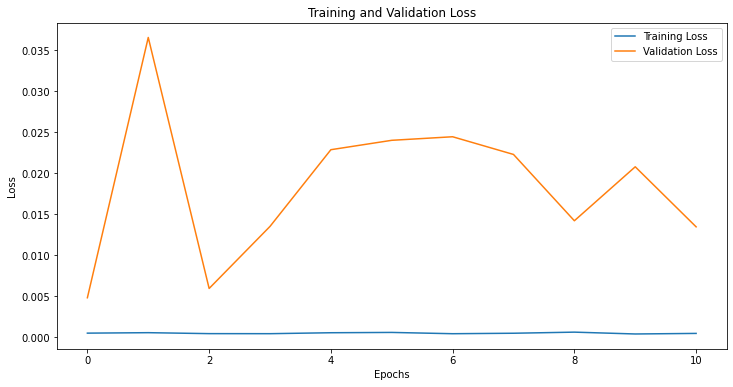

In [6]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras_tuner.tuners import RandomSearch
from keras.callbacks import EarlyStopping

tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2013-01-01')

df = df['Close'].values
df = df.reshape(-1, 1)


dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)


def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y


x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Search for the best hyperparameters
tuner.search(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

# Get the best hyperparameters for LSTM units and dropout rates
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Define the model-building function for the Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=300,
                   return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.3))
    
    model.add(LSTM(units=500,
                   return_sequences=True))
    model.add(Dropout(0.3))
    
    model.add(LSTM(units=450,
                   return_sequences=True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(units=300))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Model training
history = model.fit(x_train, y_train, epochs=150, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])


# Plot the training loss and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# For epochs and batch size (Early stopping with 200 Epochs)

INFO:tensorflow:Oracle triggered exit
Epoch 1/200
66/66 [==============================] - 143s 2s/step - loss: 6.5951e-04 - val_loss: 0.0191
Epoch 2/200
66/66 [==============================] - 142s 2s/step - loss: 6.1843e-04 - val_loss: 0.0091
Epoch 3/200
66/66 [==============================] - 143s 2s/step - loss: 7.5181e-04 - val_loss: 0.0258
Epoch 4/200
66/66 [==============================] - 148s 2s/step - loss: 4.8881e-04 - val_loss: 0.0106
Epoch 5/200
66/66 [==============================] - 147s 2s/step - loss: 5.0255e-04 - val_loss: 0.0162
Epoch 6/200
66/66 [==============================] - 143s 2s/step - loss: 5.3876e-04 - val_loss: 0.0227
Epoch 7/200
66/66 [==============================] - 144s 2s/step - loss: 4.6230e-04 - val_loss: 0.0269
Epoch 8/200
66/66 [==============================] - 139s 2s/step - loss: 5.4344e-04 - val_loss: 0.0104
Epoch 9/200
66/66 [==============================] - 138s 2s/step - loss: 6.3050e-04 - val_loss: 0.0293
Epoch 10/200
66/66 [======

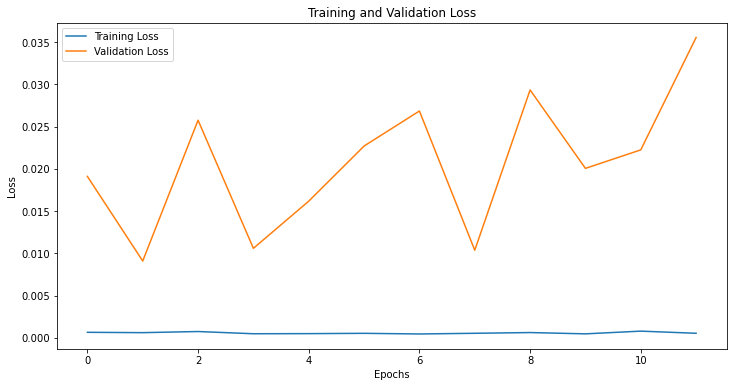

In [7]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras_tuner.tuners import RandomSearch
from keras.callbacks import EarlyStopping

tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2013-01-01')

df = df['Close'].values
df = df.reshape(-1, 1)


dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)


def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y


x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Search for the best hyperparameters
tuner.search(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

# Get the best hyperparameters for LSTM units and dropout rates
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Define the model-building function for the Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=300,
                   return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(0.3))
    
    model.add(LSTM(units=500,
                   return_sequences=True))
    model.add(Dropout(0.3))
    
    model.add(LSTM(units=450,
                   return_sequences=True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(units=300))
    model.add(Dropout(0.2))
    
    model.add(Dense(units=1))
    
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Model training
history = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping])


# Plot the training loss and validation loss over epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Automated Grid Search approach

In [20]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras_tuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split, GridSearchCV

tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2018-01-01')

df = df['Close'].values
df = df.reshape(-1, 1)


dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)


def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y


x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


# Defining the function to build the model
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_layer1', min_value=100, max_value=500, step=50),
                   return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(hp.Float('dropout_rate_layer1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units_layer2', min_value=100, max_value=500, step=50),
                   return_sequences=True))
    model.add(Dropout(hp.Float('dropout_rate_layer2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units_layer3', min_value=100, max_value=500, step=50),
                   return_sequences=True))
    model.add(Dropout(hp.Float('dropout_rate_layer3', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units_layer4', min_value=100, max_value=500, step=50)))
    model.add(Dropout(hp.Float('dropout_rate_layer4', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Instantiating the RandomSearch tuner (Creating tuner object)
tuner = RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=100,
    executions_per_trial=1,
    directory='my_dir',  # Specify a directory to save results
    project_name='my_project'
)

# Searching for the best hyperparameters
tuner.search(x_train, y_train, validation_data=(x_test, y_test))

# Inside the loop that trains the models
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
print("- units_layer1:", best_hps.get('units_layer1'))
print("- dropout_rate_layer1:", best_hps.get('dropout_rate_layer1'))
print("- units_layer2:", best_hps.get('units_layer2'))
print("- dropout_rate_layer2:", best_hps.get('dropout_rate_layer2'))
print("- units_layer3:", best_hps.get('units_layer3'))
print("- dropout_rate_layer3:", best_hps.get('dropout_rate_layer3'))
print("- units_layer4:", best_hps.get('units_layer4'))
print("- dropout_rate_layer4:", best_hps.get('dropout_rate_layer4'))

Trial 100 Complete [00h 01m 01s]
val_loss: 0.04004872217774391

Best val_loss So Far: 0.003366379998624325
Total elapsed time: 01h 45m 07s
INFO:tensorflow:Oracle triggered exit
Best hyperparameters:
- units_layer1: 150
- dropout_rate_layer1: 0.30000000000000004
- units_layer2: 300
- dropout_rate_layer2: 0.4
- units_layer3: 350
- dropout_rate_layer3: 0.30000000000000004
- units_layer4: 300
- dropout_rate_layer4: 0.4


# Automated Grid Search Run 2

In [8]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras_tuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split, GridSearchCV

tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2013-01-01')

df = df['Close'].values
df = df.reshape(-1, 1)


dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)


def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y


x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


# Defining the function to build the model
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_layer1', min_value=100, max_value=500, step=50),
                   return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(hp.Float('dropout_rate_layer1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units_layer2', min_value=100, max_value=500, step=50),
                   return_sequences=True))
    model.add(Dropout(hp.Float('dropout_rate_layer2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units_layer3', min_value=100, max_value=500, step=50),
                   return_sequences=True))
    model.add(Dropout(hp.Float('dropout_rate_layer3', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units_layer4', min_value=100, max_value=500, step=50)))
    model.add(Dropout(hp.Float('dropout_rate_layer4', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Instantiating the RandomSearch tuner (Creating tuner object)
tuner = RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=100,
    executions_per_trial=1,
    directory='my_dir',  # Specify a directory to save results
    project_name='my_project'
)

# Searching for the best hyperparameters
tuner.search(x_train, y_train, validation_data=(x_test, y_test))

# Inside the loop that trains the models
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
print("- units_layer1:", best_hps.get('units_layer1'))
print("- dropout_rate_layer1:", best_hps.get('dropout_rate_layer1'))
print("- units_layer2:", best_hps.get('units_layer2'))
print("- dropout_rate_layer2:", best_hps.get('dropout_rate_layer2'))
print("- units_layer3:", best_hps.get('units_layer3'))
print("- dropout_rate_layer3:", best_hps.get('dropout_rate_layer3'))
print("- units_layer4:", best_hps.get('units_layer4'))
print("- dropout_rate_layer4:", best_hps.get('dropout_rate_layer4'))

Trial 100 Complete [00h 01m 31s]
val_loss: 0.004298944491893053

Best val_loss So Far: 0.003712981939315796
Total elapsed time: 02h 53m 34s
INFO:tensorflow:Oracle triggered exit
Best hyperparameters:
- units_layer1: 250
- dropout_rate_layer1: 0.2
- units_layer2: 450
- dropout_rate_layer2: 0.4
- units_layer3: 500
- dropout_rate_layer3: 0.2
- units_layer4: 250
- dropout_rate_layer4: 0.2


# Automated Grid Search Run 3 (With 200 Trials)

In [15]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras_tuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split, GridSearchCV

tk = 'AAPL'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2013-01-01')

df = df['Close'].values
df = df.reshape(-1, 1)


dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)


def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y


x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


# Defining the function to build the model
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_layer1', min_value=100, max_value=500, step=50),
                   return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(hp.Float('dropout_rate_layer1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units_layer2', min_value=100, max_value=500, step=50),
                   return_sequences=True))
    model.add(Dropout(hp.Float('dropout_rate_layer2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units_layer3', min_value=100, max_value=500, step=50),
                   return_sequences=True))
    model.add(Dropout(hp.Float('dropout_rate_layer3', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units_layer4', min_value=100, max_value=500, step=50)))
    model.add(Dropout(hp.Float('dropout_rate_layer4', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Instantiating the RandomSearch tuner (Creating tuner object)
tuner = RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=200,
    executions_per_trial=1,
    directory='my_dir',  # Specify a directory to save results
    project_name='my_project'
)

# Searching for the best hyperparameters
tuner.search(x_train, y_train, validation_data=(x_test, y_test))

# Inside the loop that trains the models
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
print("- units_layer1:", best_hps.get('units_layer1'))
print("- dropout_rate_layer1:", best_hps.get('dropout_rate_layer1'))
print("- units_layer2:", best_hps.get('units_layer2'))
print("- dropout_rate_layer2:", best_hps.get('dropout_rate_layer2'))
print("- units_layer3:", best_hps.get('units_layer3'))
print("- dropout_rate_layer3:", best_hps.get('dropout_rate_layer3'))
print("- units_layer4:", best_hps.get('units_layer4'))
print("- dropout_rate_layer4:", best_hps.get('dropout_rate_layer4'))

Trial 200 Complete [00h 02m 59s]
val_loss: 0.005453156773000956

Best val_loss So Far: 0.003902949159964919
Total elapsed time: 06h 05m 09s
INFO:tensorflow:Oracle triggered exit
Best hyperparameters:
- units_layer1: 250
- dropout_rate_layer1: 0.30000000000000004
- units_layer2: 500
- dropout_rate_layer2: 0.4
- units_layer3: 500
- dropout_rate_layer3: 0.2
- units_layer4: 350
- dropout_rate_layer4: 0.4


# Automated Grid Search Run 4 (With 500 Trials)

In [17]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from keras_tuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split, GridSearchCV

tk = 'MSFT'
ticker = yf.Ticker(tk)
df = ticker.history(interval='1d', start='2013-01-01')

df = df['Close'].values
df = df.reshape(-1, 1)


dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)


def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y


x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


# Defining the function to build the model
def build_lstm_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('units_layer1', min_value=100, max_value=500, step=50),
                   return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(Dropout(hp.Float('dropout_rate_layer1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units_layer2', min_value=100, max_value=500, step=50),
                   return_sequences=True))
    model.add(Dropout(hp.Float('dropout_rate_layer2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units_layer3', min_value=100, max_value=500, step=50),
                   return_sequences=True))
    model.add(Dropout(hp.Float('dropout_rate_layer3', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units_layer4', min_value=100, max_value=500, step=50)))
    model.add(Dropout(hp.Float('dropout_rate_layer4', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Instantiating the RandomSearch tuner (Creating tuner object)
tuner = RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=500,
    executions_per_trial=1,
    directory='my_dir',  # Specify a directory to save results
    project_name='my_project'
)

# Searching for the best hyperparameters
tuner.search(x_train, y_train, validation_data=(x_test, y_test))

# Inside the loop that trains the models
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters:")
print("- units_layer1:", best_hps.get('units_layer1'))
print("- dropout_rate_layer1:", best_hps.get('dropout_rate_layer1'))
print("- units_layer2:", best_hps.get('units_layer2'))
print("- dropout_rate_layer2:", best_hps.get('dropout_rate_layer2'))
print("- units_layer3:", best_hps.get('units_layer3'))
print("- dropout_rate_layer3:", best_hps.get('dropout_rate_layer3'))
print("- units_layer4:", best_hps.get('units_layer4'))
print("- dropout_rate_layer4:", best_hps.get('dropout_rate_layer4'))

Trial 500 Complete [00h 01m 05s]
val_loss: 0.007319051306694746

Best val_loss So Far: 0.002988677006214857
Total elapsed time: 15h 36m 26s
INFO:tensorflow:Oracle triggered exit
Best hyperparameters:
- units_layer1: 400
- dropout_rate_layer1: 0.4
- units_layer2: 500
- dropout_rate_layer2: 0.2
- units_layer3: 350
- dropout_rate_layer3: 0.2
- units_layer4: 200
- dropout_rate_layer4: 0.2
